# Gradient Descent

## Simulate

- $X\sim U(0,1)$
- $y = 2 + 9X +\epsilon$
- $\epsilon \sim N(0,1)$


(1000, 1) (1000, 1)


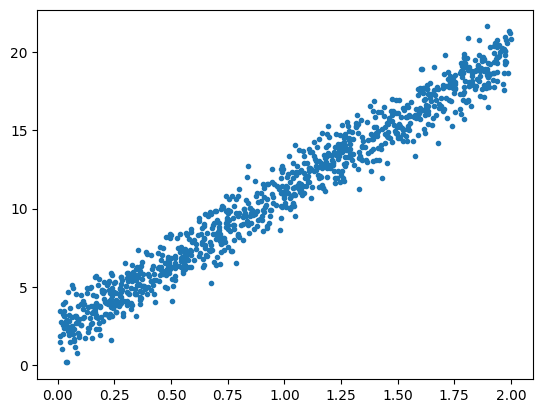

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 1000

X = 2 * np.random.rand(samples, 1)
epsilon = np.random.normal(0, 1, size=(samples, 1))


print(epsilon.shape, X.shape)

y = 2 + 9 * X + epsilon

plt.plot(X,y, '.')


In [57]:
X = np.c_[np.ones(samples), X]

In [58]:
X[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

## Train|test split

In [59]:
from sklearn.model_selection import train_test_split

#help(train_test_split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((670, 2), (330, 2), (670, 1), (330, 1))

In [60]:
np.random.seed(42)
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)  # [beta_0, beta_1]^T

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient  # learning_rate is eta in theory
    return theta

theta = gradient_descent(X_train, y_train, epochs = 2000)
theta.reshape(-1) # throws away additional dimension

array([2.20500716, 8.90206121])

In [61]:
steps = range(1, 200, 1)
thetas = np.array([gradient_descent(X_train, y_train, epochs = epoch, learning_rate=0.1).reshape(-1) for epoch in steps])
thetas

array([[2.42138167, 3.78321469],
       [3.32812076, 4.34286755],
       [4.74272409, 5.16404636],
       [3.92713643, 6.3384123 ],
       [4.48878114, 6.27786662],
       [5.46565675, 5.71419457],
       [3.99679891, 7.1369541 ],
       [3.98103469, 7.27066097],
       [4.62879245, 6.76223146],
       [5.14861859, 6.36514031],
       [4.90583674, 6.58147383],
       [4.06781264, 7.30553759],
       [3.69304086, 7.62942804],
       [4.06218211, 7.31850286],
       [3.34945084, 7.9268614 ],
       [4.37924205, 7.05161497],
       [4.63953144, 6.83087061],
       [4.56781477, 6.89213285],
       [3.42809374, 7.8616344 ],
       [4.02891642, 7.35078607],
       [3.83743636, 7.51367467],
       [3.49698708, 7.80323872],
       [3.31913222, 7.95452336],
       [4.14672621, 7.25069657],
       [3.77480152, 7.56701016],
       [3.25829131, 8.0062835 ],
       [3.57657831, 7.73559612],
       [3.34019144, 7.93663363],
       [3.32233432, 7.95182116],
       [3.3265465 , 7.9482391 ],
       [3.

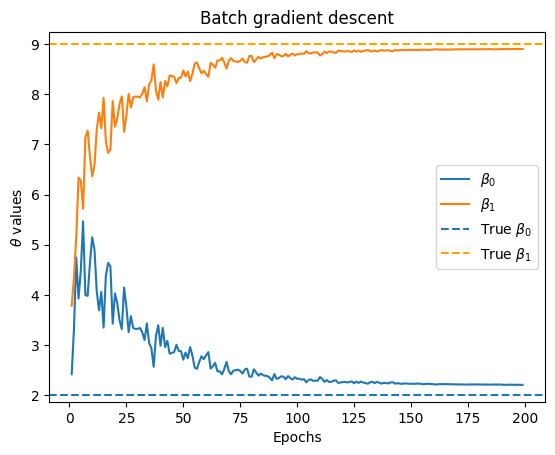

In [62]:
fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label= [r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y = 2, linestyle="--", label= r"True $\beta_0$")
ax.axhline(y = 9, color = "orange", linestyle = "--", label= r"True $\beta_1$")
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title = "Batch gradient descent")
ax.legend()


## Stochastic gradient descent (SGD)

- Geron (2019)

In [65]:
epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2, 1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1] # varför inte bara [random_index]
        y_i = y_train[random_index:random_index+1]

        gradient = 2*x_i.T.dot(x_i.dot(theta) - y_i)    
        eta = learning_rate_schedule(epoch*m+i) # to have large steps in beginning and decaying it towards the end
        theta -= eta*gradient

theta

(array([[2.20448666],
        [8.91238852]]),
 10)

In [69]:
y_pred = X_test @ theta
MAE = np.mean(np.abs(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7683201444147116, 0.9497997905816824, 0.974576723804587)